In [1]:
import igraph 
import numpy as np
import networkx as nx
import igraph as ig
import cairocffi
import matplotlib.pyplot as plt
import pandas as pd

#### TASK 1

In [ ]:
# build regular graph and proove that possible click numbers
# are 1, 2, .., [n/2], n

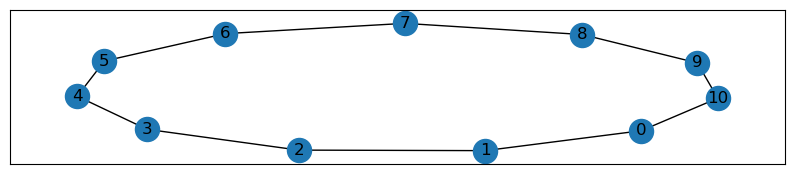

In [122]:
n = 11
circulant_graph = nx.circulant_graph(n=n, offsets=[1])

plt.figure(figsize =(10, 2))
nx.draw_networkx(circulant_graph, with_labels = True)

Allowed clique degrees = [-1, 1]


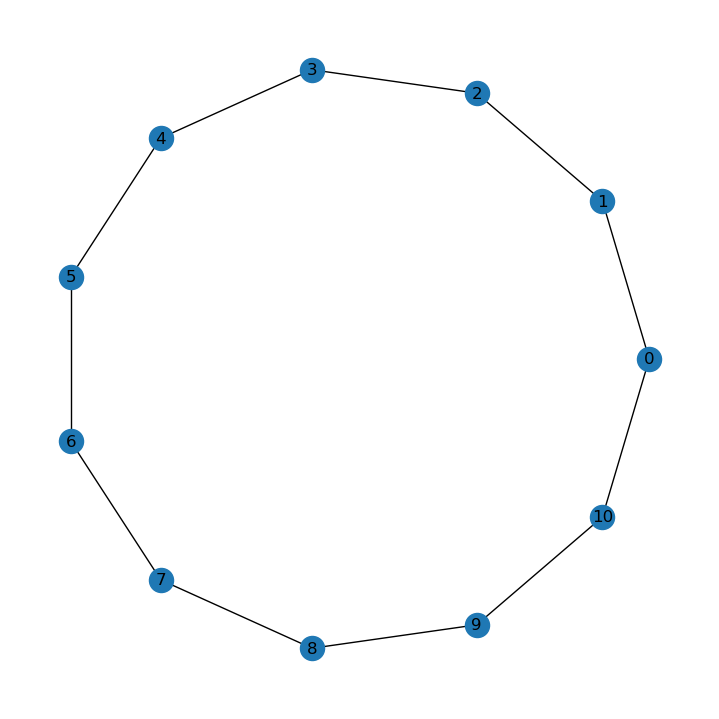

Allowed clique degrees = [-2, -1, 1, 2]


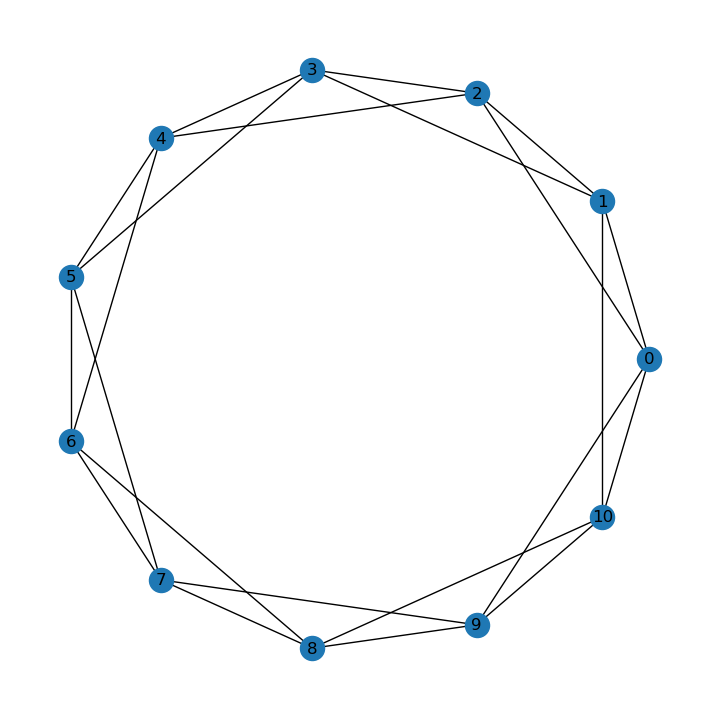

Allowed clique degrees = [-3, -2, -1, 1, 2, 3]


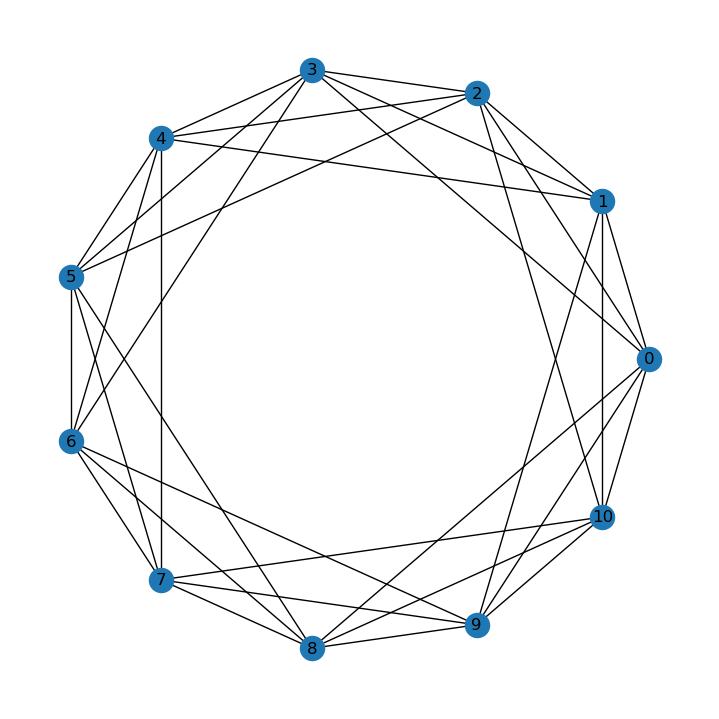

Allowed clique degrees = [-4, -3, -2, -1, 1, 2, 3, 4]


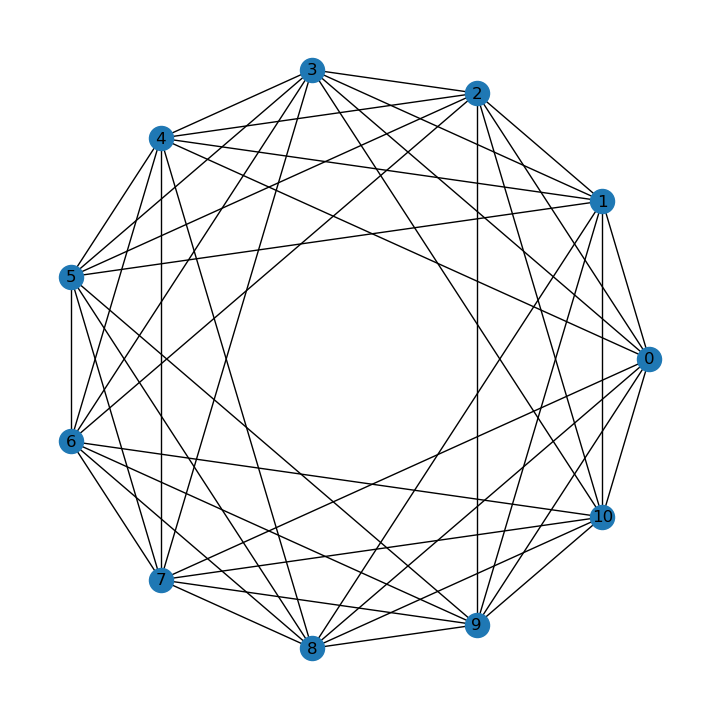

Allowed clique degrees = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]


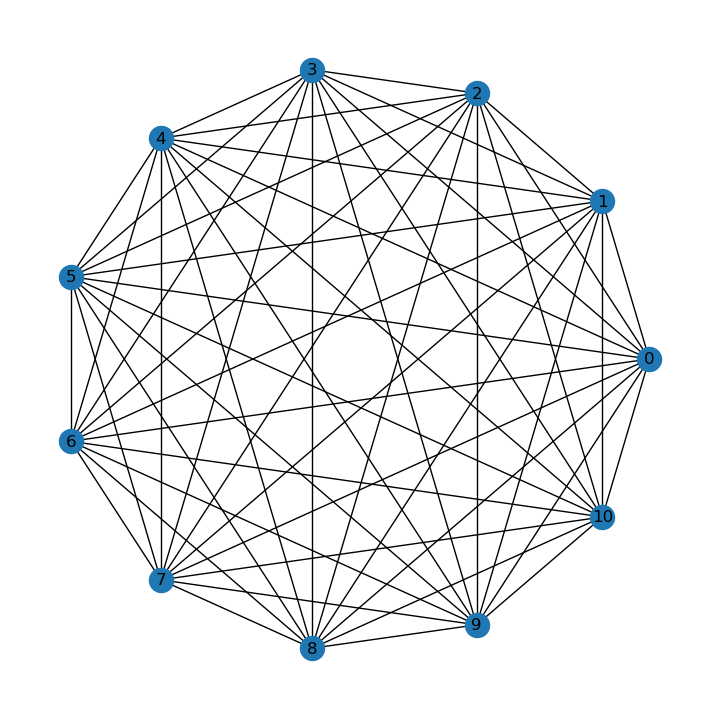

Allowed clique degrees = [-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6]


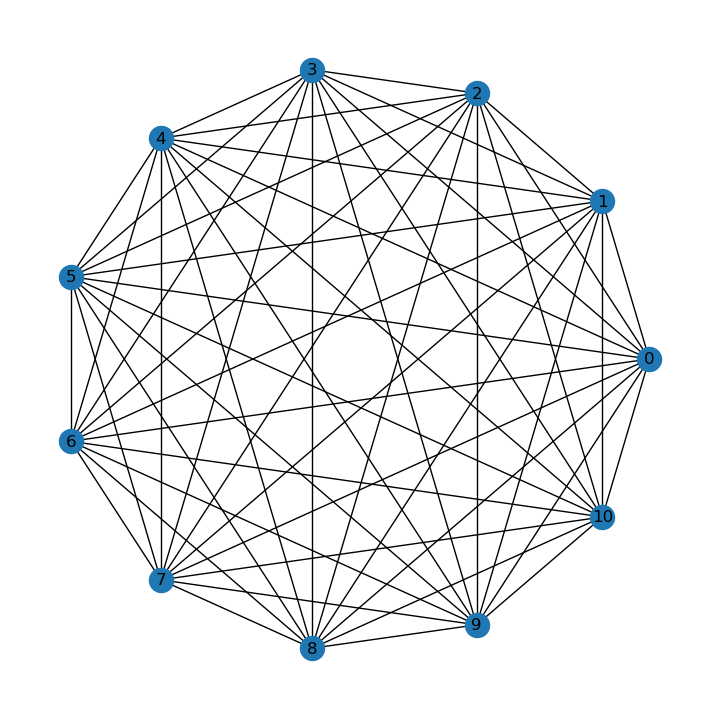

Allowed clique degrees = [-7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7]


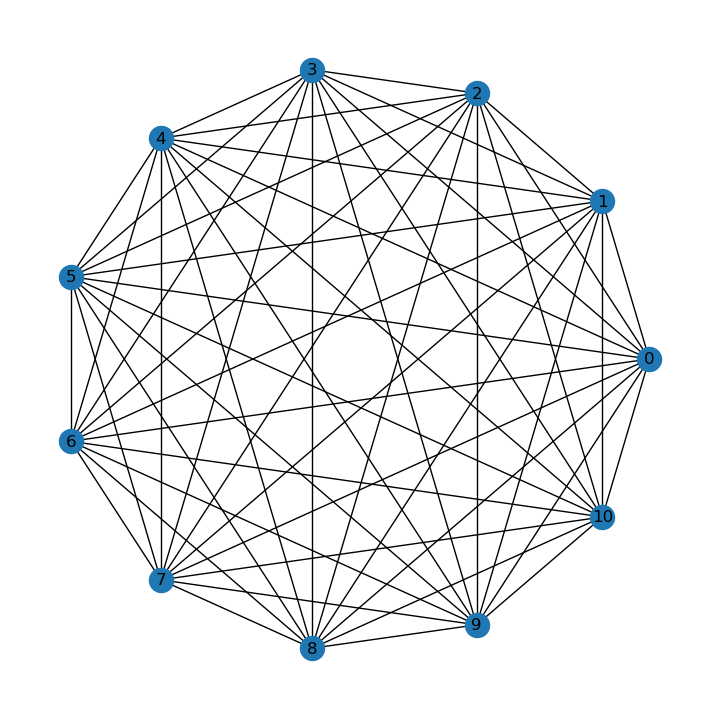

Allowed clique degrees = [-8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8]


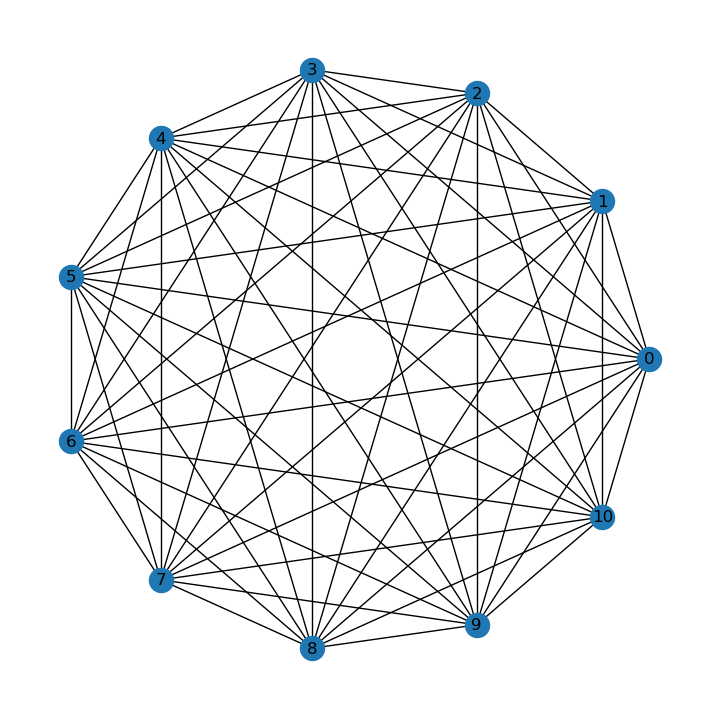

Allowed clique degrees = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9]


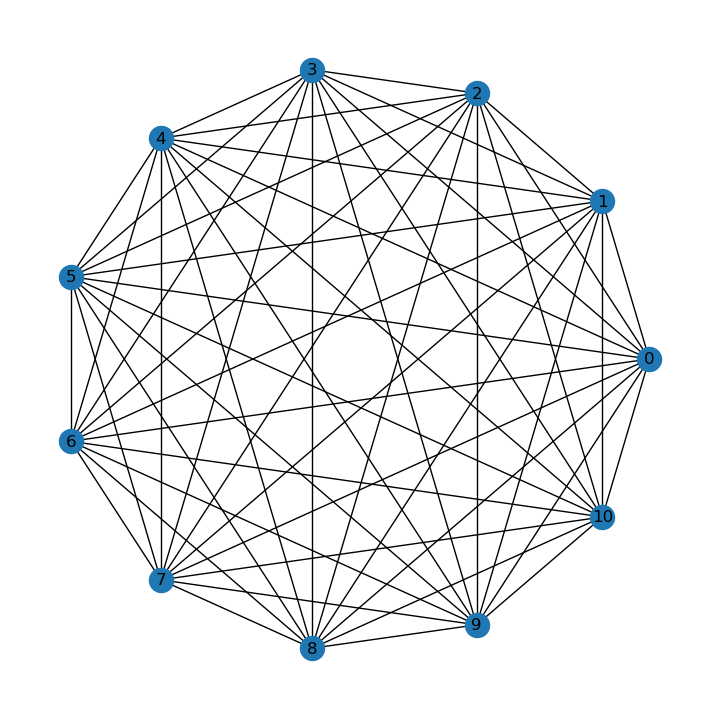

Allowed clique degrees = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


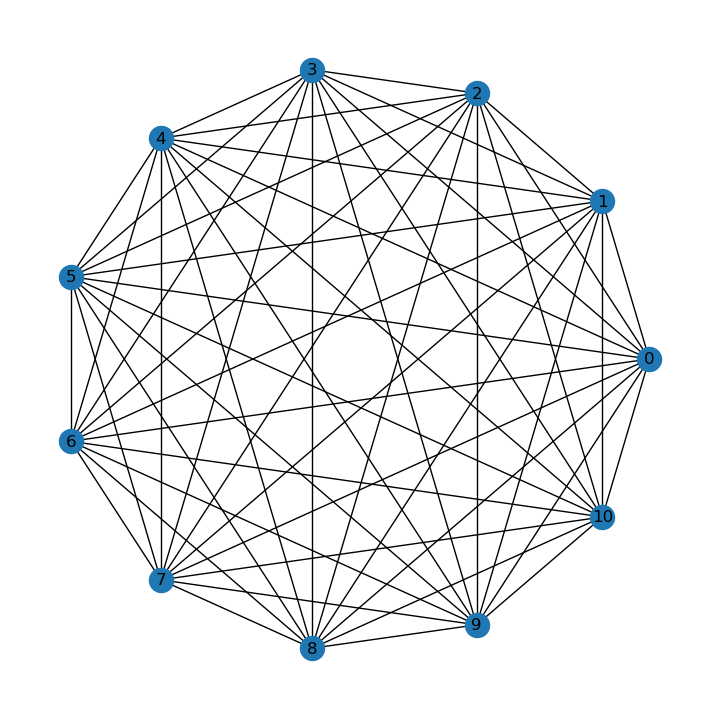

In [123]:
# create regular graph
adjacency_dict = dict( circulant_graph.adjacency() )
clique_degrees = [k for k in range(1, n)]
dict_of_regular_graphs = {}

for allowed_clique in clique_degrees:
    circulant_graph = nx.circulant_graph(n=n, offsets=[1])
    adjacency_dict = dict( circulant_graph.adjacency() )
    #print(adjacency_dict, '\n')
    allowed_degrees = [k for k in range(-allowed_clique, allowed_clique+1) if k != 0]
    print(f'Allowed clique degrees = {allowed_degrees}')
    for vertex1 in range(n):
        for vertex2 in range(n):
            #print(vertex1, vertex2, (vertex1 - vertex2) % n)
            if ((vertex1 - vertex2) % n) in allowed_degrees:
                adjacency_dict[vertex1][vertex2] = {} 
        #print()
    #print(adjacency_dict)
    dict_of_regular_graphs[allowed_clique] = nx.from_dict_of_dicts(adjacency_dict)
    
    plt.figure(figsize =(7, 7))
    nx.draw_circular(dict_of_regular_graphs[allowed_clique], with_labels = True)
    plt.show()
    
    dict_of_regular_graphs[allowed_clique] = igraph.Graph.from_networkx(dict_of_regular_graphs[allowed_clique])    

In [124]:
# show the possible clique number is a sequence
# 1, 2, 3, ... , k/2, k
for k in clique_degrees:
    print(dict_of_regular_graphs[k].clique_number(), end=' ')

2 3 4 5 11 11 11 11 11 11 

#### TASK 2

In [125]:
# realize the trinagle counting algorithm
# a) vertices walking
# b) edge walking